# Comparison of Google distance matrix API and DUAROUTER 

### Importing libraries & reading API Key

In [59]:
import requests
import os
import xml.etree.ElementTree as ET
import sumolib
import pandas as pd
from shapely.geometry import Point

endpoint = 'https://maps.googleapis.com/maps/api/distancematrix/json'

API_KEY = os.getenv('API_KEY')


### Reading trips and network

In [2]:
# reading xml of trips
tree = ET.parse('ulb/trips.trips.xml')
root = tree.getroot()

net = sumolib.net.readNet('ulb/ulb.net.xml')

In [3]:
root[0].attrib

{'id': '0', 'depart': '0.00', 'from': '30089441#2', 'to': '-14442490#2'}

In [4]:
data = {}
for trip in root:
    data[trip.attrib['id']] = {'depart' : trip.attrib['depart'], 'from' : trip.attrib['from'], 'to' : trip.attrib['to']}
data

{'0': {'depart': '0.00', 'from': '30089441#2', 'to': '-14442490#2'},
 '1': {'depart': '1.00', 'from': '-525316189#1', 'to': '-36773133'},
 '2': {'depart': '2.00', 'from': '34633121#0', 'to': '31428753#0'},
 '3': {'depart': '3.00', 'from': '571388040#0', 'to': '-171958610'},
 '4': {'depart': '4.00', 'from': '147714193#0', 'to': '-14456417#2'},
 '5': {'depart': '5.00', 'from': '-35692062#3', 'to': '180217801#1'},
 '6': {'depart': '6.00', 'from': '-14453580#2', 'to': '-33877541#1'},
 '7': {'depart': '7.00', 'from': '30601140#2', 'to': '23147770#0'},
 '8': {'depart': '8.00', 'from': '-35736877#1', 'to': '237825891#0'},
 '9': {'depart': '9.00', 'from': '40793692#2', 'to': '-1077835592#0'},
 '10': {'depart': '10.00', 'from': '40742591#15', 'to': '32922512#1'},
 '11': {'depart': '11.00', 'from': '1071065280', 'to': '-30105061#1'},
 '12': {'depart': '12.00', 'from': '830745951#1', 'to': '1077835592#0'},
 '13': {'depart': '13.00', 'from': '-189538727', 'to': '-220267250#1'},
 '14': {'depart': '

### Creating the origin and destination lists of geocoordinates

In [48]:
def getGeocoordinates(coord):
    '''
    Returns the geocoordinates of the sumo network coordinates
    '''
    #geocoordinates = []
    point = Point(coord)
    lon, lat = net.convertXY2LonLat(point.x, point.y)
    return str(lat) + "," + str(lon)
    #geocoordinates.append((lat, lon))
    #return geocoordinates


In [50]:
origins=[]
destinations=[]
for trip in data:
    fromShape = net.getEdge(data[trip]['from']).getShape()
    toShape = net.getEdge(data[trip]['to']).getShape()
    
    origins.append( getGeocoordinates(fromShape[0]))
    destinations.append( getGeocoordinates(toShape[0]))

print(origins)
print(destinations)

['50.83437543889532,4.420823821234167', '50.813793657188114,4.434500118795244', '50.81769942844321,4.4288976024538576', '50.82001039577483,4.466606804332374', '50.802394911278995,4.39780437403715', '50.83757305571695,4.380394769784555', '50.82987081201179,4.414923043634739', '50.83240648393718,4.391842089629454', '50.80654849181126,4.419394280293695', '50.795382228213136,4.37353679954569', '50.806539667970064,4.371637096242884', '50.82664021120167,4.3876553523582205', '50.82040707063207,4.374739588178312', '50.83472990543388,4.4434378524593265', '50.81012717242232,4.397394012061541', '50.82102218290476,4.4026843005759835', '50.81732317104596,4.4218885717425405', '50.83317926870989,4.386041037039449', '50.819048263125545,4.429190200397015', '50.81655046040191,4.38205516513725', '50.80246084519816,4.409834373700569', '50.82252358726541,4.416067917474153', '50.80967652430081,4.3887102772346545', '50.818469816164686,4.41709224797644', '50.83936305692909,4.399113797582186', '50.836798024594

In [52]:
#problematic edges 
a= net.getEdge('-525316189#1').getShape()

In [53]:
geocoordinates = []
for coord in a:
    point = Point(coord)
    lon, lat = net.convertXY2LonLat(point.x, point.y)
    geocoordinates.append((lat, lon))
print(geocoordinates)

[(50.813793657188114, 4.434500118795244), (50.81410933411599, 4.433987256381771)]


In [54]:
origins

['50.83437543889532,4.420823821234167',
 '50.813793657188114,4.434500118795244',
 '50.81769942844321,4.4288976024538576',
 '50.82001039577483,4.466606804332374',
 '50.802394911278995,4.39780437403715',
 '50.83757305571695,4.380394769784555',
 '50.82987081201179,4.414923043634739',
 '50.83240648393718,4.391842089629454',
 '50.80654849181126,4.419394280293695',
 '50.795382228213136,4.37353679954569',
 '50.806539667970064,4.371637096242884',
 '50.82664021120167,4.3876553523582205',
 '50.82040707063207,4.374739588178312',
 '50.83472990543388,4.4434378524593265',
 '50.81012717242232,4.397394012061541',
 '50.82102218290476,4.4026843005759835',
 '50.81732317104596,4.4218885717425405',
 '50.83317926870989,4.386041037039449',
 '50.819048263125545,4.429190200397015',
 '50.81655046040191,4.38205516513725',
 '50.80246084519816,4.409834373700569',
 '50.82252358726541,4.416067917474153',
 '50.80967652430081,4.3887102772346545',
 '50.818469816164686,4.41709224797644',
 '50.83936305692909,4.3991137975

In [55]:
destinations

['50.830584308601935,4.397308006346473',
 '50.82287523928125,4.418716841964817',
 '50.81766330458234,4.405068895870757',
 '50.83505234427359,4.396550565597335',
 '50.82162168157847,4.424324278785643',
 '50.817347998790986,4.483010820706597',
 '50.82617081575864,4.454339472282124',
 '50.83841525785151,4.463838892625032',
 '50.81200585464729,4.427463142681984',
 '50.82808763089034,4.39037149049844',
 '50.80978155877299,4.422159345045173',
 '50.836470664099714,4.4217348969589665',
 '50.82758439585621,4.390444434555247',
 '50.8179584186898,4.385939306805768',
 '50.830253165824466,4.46969027608071',
 '50.82557040982789,4.483892412383143',
 '50.80756051937103,4.3913337739148615',
 '50.83572440821074,4.43922114195962',
 '50.82119598162899,4.417142689785012',
 '50.83677227751518,4.408039280759583',
 '50.81254736844388,4.417593509392381',
 '50.82489030819377,4.399459631569576',
 '50.79182190714367,4.4196415553215',
 '50.80428528605225,4.38892241028651',
 '50.83679802459434,4.387021683228787',
 

In [14]:
# Define the list of origin and destination coordinates
origins = [
    '50.85045,4.34878',  # Grand Place, Brussels
    '51.21944,4.40246',  # Antwerp Central Station
    '51.22172,4.41539',  # Rubenshuis, Antwerp
    # Add more origin coordinates as needed
]

destinations = [
    '50.89504,4.34134',  # Atomium, Brussels
    '51.21291,4.42549',  # MAS Museum, Antwerp
    '51.21762,4.41594',  # Cathedral of Our Lady, Antwerp
    # Add more destination coordinates as needed
]


In [15]:
origins[:5]

['50.85045,4.34878', '51.21944,4.40246', '51.22172,4.41539']

## Call to the Google distance matrix API

In [56]:
# API parameters
params = {
    'origins': origins[:5],
    'destinations':destinations[:5],
    'key': API_KEY
}

response = requests.get(endpoint, params=params)

if response.status_code == 200:
    data = response.json()
    rows = data['rows']
    for row in rows:
        elements = row['elements']
        for element in elements:
            distance = element['distance']['text']
            duration = element['duration']['text']
            print(f"Distance: {distance}")
            print(f"Duration: {duration}")
else:
    print("fail")

Distance: 2.4 km
Duration: 7 mins


In [57]:
data

{'destination_addresses': ['Rue Général Fivé 76, 1040 Etterbeek, Belgium'],
 'origin_addresses': ['N3 327, 1150 Woluwe-Saint-Pierre, Belgium'],
 'rows': [{'elements': [{'distance': {'text': '2.4 km', 'value': 2425},
     'duration': {'text': '7 mins', 'value': 442},
     'status': 'OK'}]}],
 'status': 'OK'}

# Grades of CS seminar

In [60]:


#df = pd.read_csv('data.txt', sep=" ", columns=['matricule', 'algo', 'opti', "secu", "ia", "finale"])

#read csv file separated by space with columns : ['matricule', 'algo', 'opti', "secu", "ia", "finale"]
df = pd.read_csv('data_seminar_grades.txt', sep=" ",names=['matricule', 'algo', 'opti', "secu", "ia", "finale"], header=None)


In [61]:
df

,matricule,algo,opti,secu,ia,finale
0,453422,13.5,13.0,8.0,12.0,14.5
1,459811,10.5,9.5,7.0,12.0,12.0
2,472367,12.0,9.0,7.5,10.5,12.0
3,459817,10.5,13.5,9.5,8.0,13.0
4,459828,15.5,13.5,12.5,16.0,18.0
...,...,...,...,...,...,...
69,459766,13.0,13.0,13.0,15.5,17.0
70,459770,14.5,13.5,12.0,15.0,17.0
71,408665,12.0,13.0,11.5,14.0,16.0
72,459786,10.5,10.0,0.0,13.5,10.5


<AxesSubplot: ylabel='Frequency'>

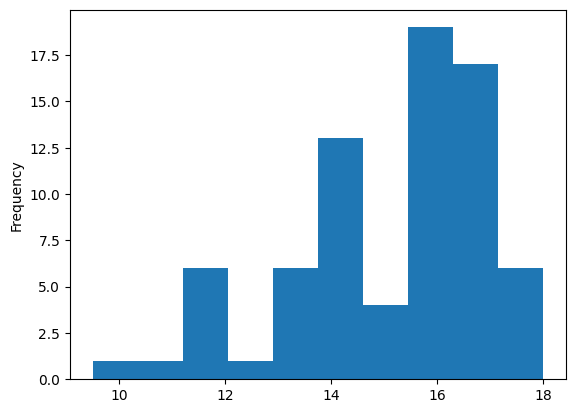

In [62]:
# plot a histogram of the final grade
df['finale'].plot.hist()

In [63]:
#get the mean of the final grade
df['finale'].mean()

15.10135135135135

In [64]:
df['finale'].median()

15.5

In [67]:
df[df["finale"].le(13)]

,matricule,algo,opti,secu,ia,finale
1,459811,10.5,9.5,7.0,12.0,12.0
2,472367,12.0,9.0,7.5,10.5,12.0
3,459817,10.5,13.5,9.5,8.0,13.0
9,459836,11.5,11.0,7.5,8.5,12.0
24,521321,11.0,6.5,10.0,11.5,12.0
29,440969,8.5,11.0,9.0,8.5,11.5
32,444863,4.5,12.0,6.0,8.0,9.5
34,425393,10.5,8.0,10.0,12.0,12.5
45,459274,11.0,9.5,9.5,11.0,13.0
57,425450,13.5,7.5,8.0,10.0,12.0
